In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
x = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1])
f = np.array([
    0.0, 0.021470, 0.293050, 0.494105, 0.541341,
    0.516855, 0.468617, 0.416531, 0.367879
])

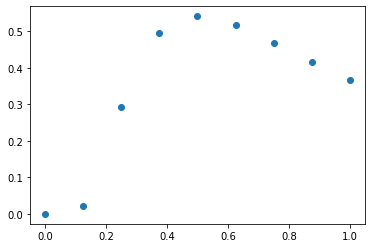

In [41]:
plt.scatter(x, f)

In [46]:
def TrpapezMthd(x, y) -> float:
    res = 0
    for i in range(1, np.shape(x)[0]):
        h_i = x[i] - x[i-1]
        res += ((f[i] + f[i-1]) / 2) * h_i
    return res

# работает только на равномерной сетке
def SympsonMthd(x, y) -> float:
    res = 0
    h = x[1] - x[0] 
    for i in range(0, np.shape(x)[0] - 2, 2):
        res += ((f[i] + 4*f[i+1] + f[i+2]) / 6) * h*2
    return res

In [47]:
print(TrpapezMthd(x, f))
print(SympsonMthd(x, f))

0.3669885625
0.36540579166666665
